In [9]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [10]:
(training_data, training_label), (testing_data, testing_label) = tf.keras.datasets.fashion_mnist.load_data()

In [11]:
label = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat","Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [12]:
print(f"Shape of training data  is : {training_data.shape}")
print(f"Shape of training label is : {training_label.shape}")
print(f"Shape of testing data   is : {testing_data.shape}")
print(f"Shape of testing label  is : {testing_label.shape}")

Shape of training data  is : (60000, 28, 28)
Shape of training label is : (60000,)
Shape of testing data   is : (10000, 28, 28)
Shape of testing label  is : (10000,)


Text(0.5, 1.0, 'Ankle boot')

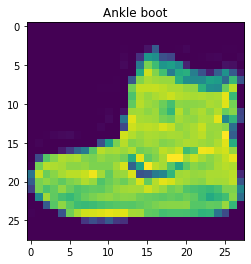

In [13]:
plt.imshow(training_data[0])
plt.title(label[training_label[0]])

In [14]:
training_data = training_data / 255.0
testing_data  = testing_data  / 255.0

In [ ]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(128),
    tf.keras.layers.Dense(10)
])

model1.compile(optimizer = tf.keras.optimizers.Adam() , loss = tf.keras.losses.sparse_categorical_crossentropy)
model1.fit(training_data, training_label, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 5.2731
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 2.2004
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 2.2936
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 2.2947
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 2.2935


In [ ]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(128, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(10,  activation = tf.keras.activations.softmax)
])

model2.compile(optimizer = tf.keras.optimizers.Adam() , loss = tf.keras.losses.sparse_categorical_crossentropy)
model2.fit(training_data, training_label, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4979
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3735
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3351
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3100
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2947


In [ ]:
model3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(1024, activation = tf.keras.activations.elu),
    tf.keras.layers.Dense(512,  activation = tf.keras.activations.elu),
    tf.keras.layers.Dense(256,  activation = tf.keras.activations.elu),
    tf.keras.layers.Dense(128,  activation = tf.keras.activations.elu),
    tf.keras.layers.Dense(10,   activation = tf.keras.activations.softmax)
])

model3.compile(optimizer = tf.keras.optimizers.Adam() , loss = tf.keras.losses.sparse_categorical_crossentropy)
model3.fit(training_data, training_label, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 41s 21ms/step - loss: 0.5194
Epoch 2/5
1875/1875 [==============================] - 38s 20ms/step - loss: 0.3985
Epoch 3/5
1875/1875 [==============================] - 41s 22ms/step - loss: 0.3666
Epoch 4/5
1875/1875 [==============================] - 46s 25ms/step - loss: 0.3445
Epoch 5/5
1875/1875 [==============================] - 45s 24ms/step - loss: 0.3261


In [ ]:
model4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(512, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(10,  activation = tf.keras.activations.softmax)
])

model4.compile(optimizer = tf.keras.optimizers.Adam() , loss = tf.keras.losses.sparse_categorical_crossentropy)
model4.fit(training_data, training_label, epochs = 20)

1875/1875 [==============================] - 12s 6ms/step - loss: 0.2138
Epoch 12/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2057
Epoch 13/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2002
Epoch 14/20
1875/1875 [==============================] - 12s 7ms/step - loss: 0.1938
Epoch 15/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1847
Epoch 16/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1796
Epoch 17/20
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1730
Epoch 18/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1695
Epoch 19/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1626
Epoch 20/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1583


In [15]:
class CallBack(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epochs, logs = {}):
        if logs['accuracy'] > 0.95:
            print(f"Model accuracy is more than {(logs['accuracy'] * 100)} %%")
            self.model.stop_training = True

cb = CallBack()
model4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(1024, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(10,  activation = tf.keras.activations.softmax)
])

model4.compile(optimizer = tf.keras.optimizers.Adam() , loss = tf.keras.losses.sparse_categorical_crossentropy, metrics = ['accuracy'])
model4.fit(training_data, training_label, epochs = 100, callbacks=[cb])

1875/1875 [==============================] - 15s 8ms/step - loss: 0.1418 - accuracy: 0.9468
Epoch 25/100
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1395 - accuracy: 0.9482
Epoch 26/100
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1307 - accuracy: 0.9503


In [19]:
model4.history.history.keys()

dict_keys(['loss', 'accuracy'])

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_style('darkgrid')

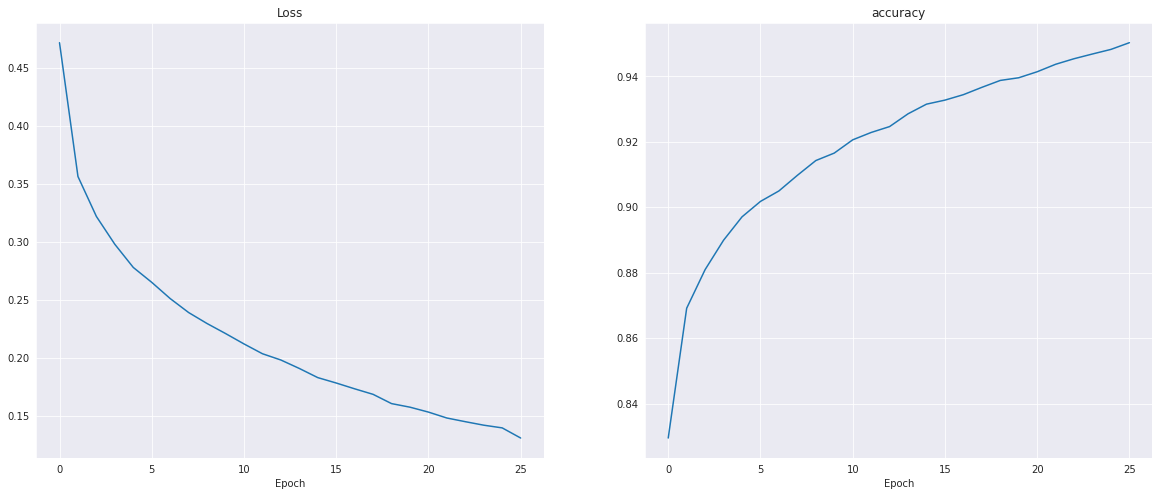

In [27]:
fig, ax = plt.subplots(1,2, figsize=(20,8))

ax[0].plot(np.arange(len(model4.history.history['loss'])), model4.history.history['loss'])
ax[0].set_title('Loss')
ax[0].set_xlabel("Epoch")

ax[1].plot(np.arange(len(model4.history.history['accuracy'])), model4.history.history['accuracy'])
ax[1].set_title('accuracy')
ax[1].set_xlabel("Epoch")

fig.show()

1/1 [==============================] - 0s 19ms/step


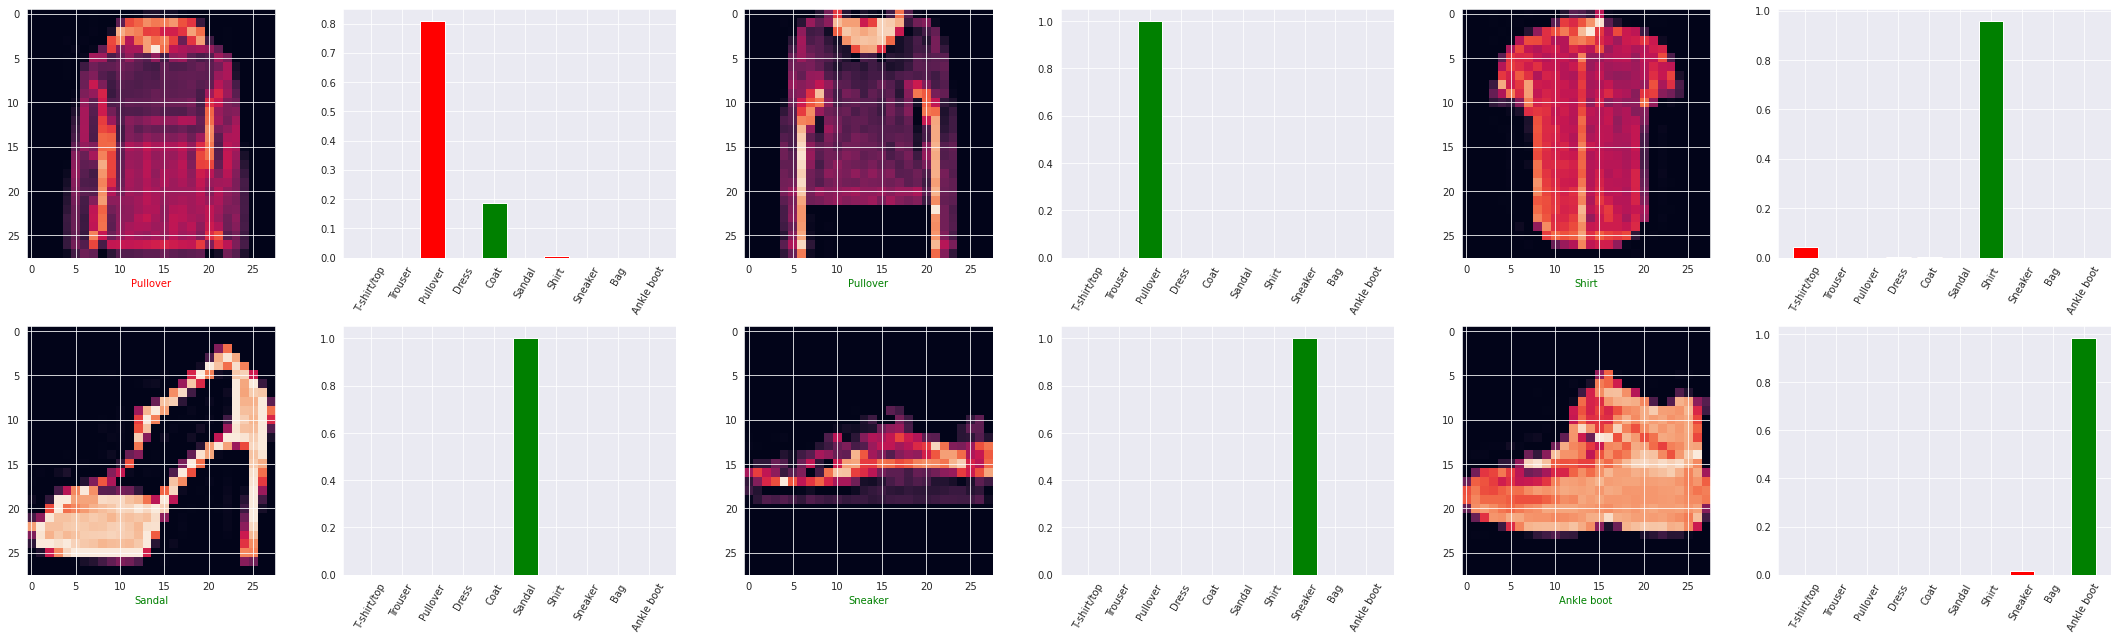

In [56]:
fig, ax = plt.subplots(2,6, figsize=(30,9))


for i in range(2):
    for j in range(0,6,2):
        random_val = np.random.randint(0,10000)
        test_img  = testing_data[random_val].reshape(1,28,28)
        act_label = testing_label[random_val]
        raw_label = model4.predict(test_img)[0]
        pre_label = raw_label.argmax()

        ax[i][j].imshow(test_img[0])
        if pre_label == act_label:
            ax[i][j].set_xlabel(label[pre_label], c='green')
        else:
            ax[i][j].set_xlabel(label[pre_label], c='red')

        col = ['red' for i in range(10)]
        col[act_label] = 'green'
        ax[i][j+1].bar(label, raw_label, color = col)
        ax[i][j+1].set_xticklabels(label, rotation = 60)

fig.tight_layout()
fig.show()